In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
Data = pd.read_csv('DAB_303_In class Group_Presentaion_Group 2_Loan_default orignal.csv')

In [ ]:
# Exploratory Data Analysis (EDA)
print(Data.info())  # Display data types and non-null counts


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150936 entries, 0 to 150935
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          150936 non-null  object 
 1   Age             150936 non-null  int64  
 2   Income          150936 non-null  int64  
 3   LoanAmount      150936 non-null  int64  
 4   CreditScore     150936 non-null  int64  
 5   MonthsEmployed  150936 non-null  int64  
 6   NumCreditLines  150936 non-null  int64  
 7   InterestRate    150936 non-null  float64
 8   LoanTerm        150936 non-null  int64  
 9   DTIRatio        150936 non-null  float64
 10  Education       150936 non-null  object 
 11  EmploymentType  150936 non-null  object 
 12  MaritalStatus   150936 non-null  object 
 13  HasMortgage     150935 non-null  object 
 14  HasDependents   150935 non-null  object 
 15  LoanPurpose     150935 non-null  object 
 16  HasCoSigner     150935 non-null  object 
 17  Default   

In [ ]:
print("\nFirst 5 rows of data:")
print(Data.head())

# Checking for missing values
print("\nMissing values:")
print(Data.isnull().sum())

# Drop rows with missing values (simplified for this example)
df = Data.dropna()


First 5 rows of data:
       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other 

In [ ]:
# Check the data types of all columns
print(Data.dtypes)

# Identify categorical columns
categorical_columns = Data.select_dtypes(exclude=[np.number]).columns
print(f"Categorical columns: {categorical_columns}")

LoanID             object
Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default           float64
dtype: object
Categorical columns: Index(['LoanID', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object')


In [ ]:
import numpy as np
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv('DAB_303_In class Group_Presentaion_Group 2_Loan_default.csv')

# Impute missing numerical values with the median
num_imputer = SimpleImputer(strategy="median")
df[['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines',
    'InterestRate', 'LoanTerm', 'DTIRatio']] = num_imputer.fit_transform(df[['Age', 'Income', 'LoanAmount', 'CreditScore',
    'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']])

# Fill missing categorical values with "Unknown"
df[['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose']] = df[['Education', 'EmploymentType',
                                                                          'MaritalStatus', 'LoanPurpose']].fillna("Unknown")

# Convert binary categorical features
df['HasMortgage'] = df['HasMortgage'].map({'Yes': 1, 'No': 0})
df['HasDependents'] = df['HasDependents'].map({'Yes': 1, 'No': 0})
df['HasCoSigner'] = df['HasCoSigner'].map({'Yes': 1, 'No': 0})

# Feature Engineering: Add Loan-to-Income Ratio
df["Loan_to_Income_Ratio"] = df["LoanAmount"] / df["Income"]
df["Loan_to_Income_Ratio"] = df["Loan_to_Income_Ratio"].fillna(df["Loan_to_Income_Ratio"].median())  # Fix inplace warning

# Define features and target variable
X = df[['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio',
        'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner', 'Loan_to_Income_Ratio']]
y = df['Default']

# Encode categorical variables
column_transformer = ColumnTransformer([
    ('encoder', OneHotEncoder(handle_unknown='ignore'), ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose'])
], remainder='passthrough')

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(column_transformer.fit_transform(X_train))
X_test_scaled = scaler.transform(column_transformer.transform(X_test))

# Check for NaNs in transformed data
if np.isnan(X_train_scaled).sum() > 0 or np.isnan(X_test_scaled).sum() > 0:
    print("Warning: NaN values still exist in processed data!")
    # Drop rows with NaNs before model training
    X_train_scaled = pd.DataFrame(X_train_scaled).dropna().to_numpy()
    y_train = y_train.loc[X_train.index]  # Align y_train

# Train Models
logreg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)

logreg.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
gb.fit(X_train_scaled, y_train)

# Save models
joblib.dump(logreg, "logistic_regression.pkl")
joblib.dump(rf, "random_forest.pkl")
joblib.dump(gb, "gradient_boosting.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(column_transformer, "column_transformer.pkl")

# Evaluate Models
y_pred_logreg = logreg.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)
y_pred_gb = gb.predict(X_test_scaled)

print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_logreg):.4f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")


Logistic Regression Accuracy: 0.8880
Random Forest Accuracy: 0.8865
Gradient Boosting Accuracy: 0.8876


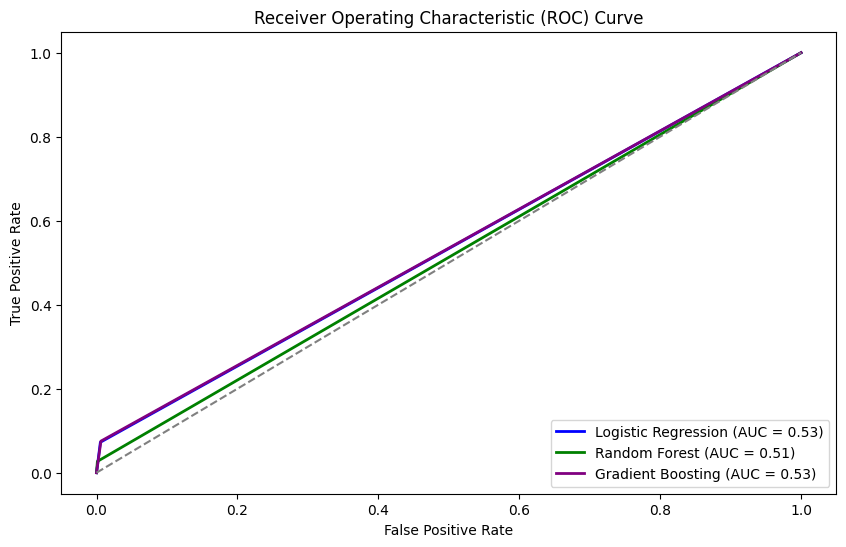

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Create DataFrame for predictions
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Logistic Regression': y_pred_logreg,
    'Random Forest': y_pred_rf,
    'Gradient Boosting': y_pred_gb
})

# Calculate ROC curve and AUC for each model
fpr_logreg, tpr_logreg, _ = roc_curve(predictions_df['Actual'], predictions_df['Logistic Regression'])
fpr_rf, tpr_rf, _ = roc_curve(predictions_df['Actual'], predictions_df['Random Forest'])
fpr_gb, tpr_gb, _ = roc_curve(predictions_df['Actual'], predictions_df['Gradient Boosting'])

roc_auc_logreg = auc(fpr_logreg, tpr_logreg)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plot ROC Curve for all models
plt.figure(figsize=(10, 6))
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_gb, tpr_gb, color='purple', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')

# Plot the diagonal line for random chance (No skill)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Set plot labels and title
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Show the plot
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


# Load trained models and preprocessing objects
logreg = joblib.load("logistic_regression.pkl")
rf = joblib.load("random_forest.pkl")
gb = joblib.load("gradient_boosting.pkl")
scaler = joblib.load("scaler.pkl")
column_transformer = joblib.load("column_transformer.pkl")

# Function to validate user inputs
def get_valid_input(prompt, dtype, valid_range=None, options=None):
    while True:
        try:
            value = input(prompt).strip()

            # Convert input to the required type
            if dtype == int:
                value = int(value)
            elif dtype == float:
                value = float(value)

            # Validate range for numerical inputs
            if valid_range and not (valid_range[0] <= value <= valid_range[1]):
                print(f"❌ Error: Value must be between {valid_range[0]} and {valid_range[1]}. Try again.")
                continue

            # Validate categorical options
            if options and value not in options:
                print(f"❌ Error: Please enter one of the following options: {', '.join(options)}. Try again.")
                continue

            return value

        except ValueError:
            print("❌ Error: Invalid format. Please enter a correct value.")

def loan_approval_calculator():
    print("\n📌 **Loan Approval Calculator**")

    # Collect user input with validation
    age = get_valid_input("Enter your age (18-100): ", int, (18, 100))
    income = get_valid_input("Enter your annual income: ", float)
    loan_amount = get_valid_input("Enter your loan amount: ", float)
    credit_score = get_valid_input("Enter your credit score (300-850): ", int, (300, 850))
    months_employed = get_valid_input("Enter number of months employed: ", int, (0, 600))
    num_credit_lines = get_valid_input("Enter number of active credit lines (0-50): ", int, (0, 50))
    interest_rate = get_valid_input("Enter loan interest rate (0-50%): ", float, (0, 50))
    loan_term = get_valid_input("Enter loan term in months (12-360): ", int, (12, 360))
    dti_ratio = get_valid_input("Enter your Debt-to-Income ratio: ", float)

    # Validate categorical options
    education = get_valid_input("Enter your education level (High School/College/Graduate): ", str, options=["High School", "College", "Graduate"])
    employment_type = get_valid_input("Enter your employment type (Full-time/Part-time/Unemployed): ", str, options=["Full-time", "Part-time", "Unemployed"])
    marital_status = get_valid_input("Enter your marital status (Single/Married/Divorced): ", str, options=["Single", "Married", "Divorced"])
    loan_purpose = get_valid_input("Enter loan purpose (Car/Home/Business/Personal): ", str, options=["Car", "Home", "Business", "Personal"])

    # Validate Yes/No questions
    has_mortgage = get_valid_input("Do you have a mortgage? (Yes/No): ", str, options=["Yes", "No"])
    has_dependents = get_valid_input("Do you have dependents? (Yes/No): ", str, options=["Yes", "No"])
    has_cosigner = get_valid_input("Do you have a cosigner? (Yes/No): ", str, options=["Yes", "No"])

    # Convert Yes/No answers to binary values
    has_mortgage = 1 if has_mortgage == "Yes" else 0
    has_dependents = 1 if has_dependents == "Yes" else 0
    has_cosigner = 1 if has_cosigner == "Yes" else 0

    # Feature Engineering: Loan-to-Income Ratio
    loan_to_income_ratio = loan_amount / income if income > 0 else 0

    # Create DataFrame for input and include Loan_to_Income_Ratio
    user_data = pd.DataFrame({
        'Age': [age],
        'Income': [income],
        'LoanAmount': [loan_amount],
        'CreditScore': [credit_score],
        'MonthsEmployed': [months_employed],
        'NumCreditLines': [num_credit_lines],
        'InterestRate': [interest_rate],
        'LoanTerm': [loan_term],
        'DTIRatio': [dti_ratio],
        'Education': [education],
        'EmploymentType': [employment_type],
        'MaritalStatus': [marital_status],
        'HasMortgage': [has_mortgage],
        'HasDependents': [has_dependents],
        'LoanPurpose': [loan_purpose],
        'HasCoSigner': [has_cosigner],
        'Loan_to_Income_Ratio': [loan_to_income_ratio]  # Add new feature
    })

    # Transform categorical features and scale numeric features
    try:
        user_data_transformed = column_transformer.transform(user_data)
        user_data_scaled = scaler.transform(user_data_transformed)
    except Exception as e:
        print(f"\n❌ Error in data transformation: {e}")
        return

    # Make predictions using all models
    logreg_prediction = logreg.predict(user_data_scaled)
    rf_prediction = rf.predict(user_data_scaled)
    gb_prediction = gb.predict(user_data_scaled)

    # Display predictions for all models
    print("\n🔹 **Loan Approval Prediction (0 = Not Approved, 1 = Approved)** 🔹")
    print(f"📌 Logistic Regression: {logreg_prediction[0]}")
    print(f"📌 Random Forest: {rf_prediction[0]}")
    print(f"📌 Gradient Boosting: {gb_prediction[0]}")

    # **Majority Vote Decision**: Loan is approved if at least 2 models predict approval
    final_decision = (logreg_prediction[0] + rf_prediction[0] + gb_prediction[0]) >= 2
    print(f"\n✅ **Final Loan Approval (Majority Vote):** {'Approved' if final_decision else 'Not Approved'}")


In [ ]:
# Call the loan approval calculator
loan_approval_calculator()


📌 **Loan Approval Calculator**
Enter your age (18-100): 25
Enter your annual income: 85000
Enter your loan amount: 30000
Enter your credit score (300-850): 750
Enter number of months employed: 24
Enter number of active credit lines (0-50): 2
Enter loan interest rate (0-50%): 15.5
Enter loan term in months (12-360): 18
Enter your Debt-to-Income ratio: 0.21
Enter your education level (High School/College/Graduate): Graduate
Enter your employment type (Full-time/Part-time/Unemployed): Full-time
Enter your marital status (Single/Married/Divorced): Single
Enter loan purpose (Car/Home/Business/Personal): Car
Do you have a mortgage? (Yes/No): No
Do you have dependents? (Yes/No): No
Do you have a cosigner? (Yes/No): No

🔹 **Loan Approval Prediction (0 = Not Approved, 1 = Approved)** 🔹
📌 Logistic Regression: 0
📌 Random Forest: 0
📌 Gradient Boosting: 0

✅ **Final Loan Approval (Majority Vote):** Not Approved


In [ ]:
# Call the loan approval calculator
loan_approval_calculator()